The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 MB 15.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.12.0.88
    Uninstalling opencv-python-4.12.0.88:
      Successfully uninstalled opencv-python-4.12.0.88


Name: opencv-python
Version: 4.5.5.64
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/skvark/opencv-python
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.11/dist-packages
Requires: numpy
Required-by: dopamine_rl


 ['Code', 'Models', 'CW_Dataset.zip', 'Personal_Dataset', 'test_functions.ipynb'] 



 Number of training images loaded: 2394


Training label distribution: Counter({1: 1940, 0: 376, 2: 78})
Iteration 1, loss = 0.66991408
Iteration 2, loss = 0.57409495
Iteration 3, loss = 0.56702916
Iteration 4, loss = 0.55991766
Iteration 5, loss = 0.55204111
Iteration 6, loss = 0.54321872
Iteration 7, loss = 0.53643751
Iteration 8, loss = 0.52836317
Iteration 9, loss = 0.52773633
Iteration 10, loss = 0.52609201
Iteration 11, loss = 0.52745289
Iteration 12, loss = 0.52586215
Iteration 13, loss = 0.52763140
Iteration 14, loss = 0.52575072
Iteration 15, loss = 0.52203471
Iteration 16, loss = 0.52291242
Iteration 17, loss = 0.52503496
It

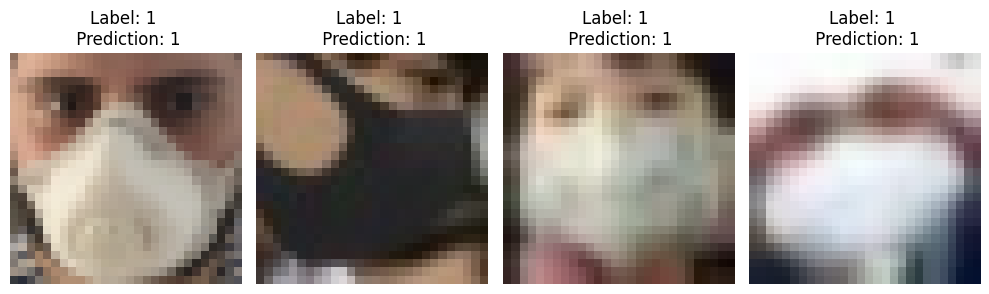


 HOG+MLP test


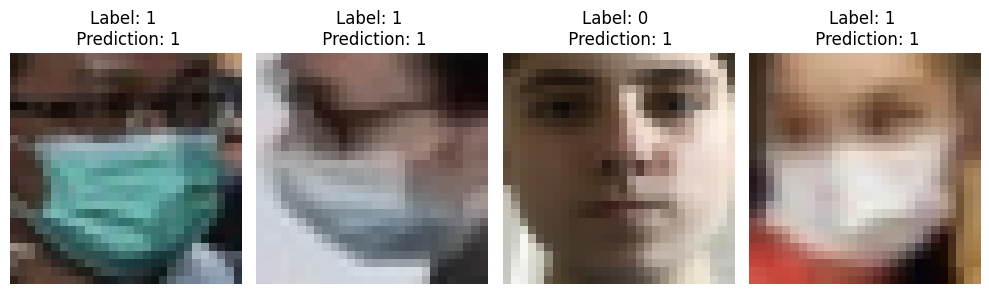


 SIFT+SVM test


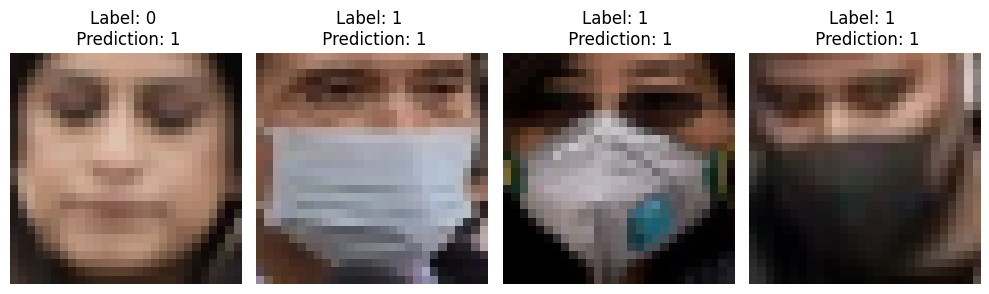


 Classification report for classifier SVC(kernel='linear'): 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.85      1.00      0.92       388
           2       0.00      0.00      0.00        19

    accuracy                           0.85       458
   macro avg       0.28      0.33      0.31       458
weighted avg       0.72      0.85      0.78       458



 Classification report for classifier MLPClassifier(hidden_layer_sizes=(50, 100), learning_rate_init=0.1,
              max_iter=100, random_state=1, solver='sgd', verbose=True): 
               precision    recall  f1-score   support

           0       0.33      0.02      0.04        51
           1       0.85      1.00      0.92       388
           2       0.00      0.00      0.00        19

    accuracy                           0.85       458
   macro avg       0.40      0.34      0.32       458
weighted avg       0.76      0.85      0.78    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

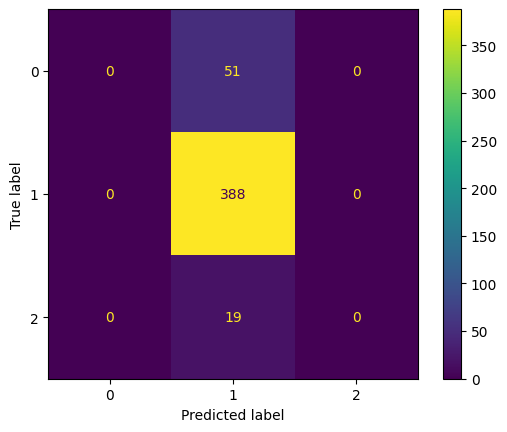


 Confusion matrix for HOG+MLP model


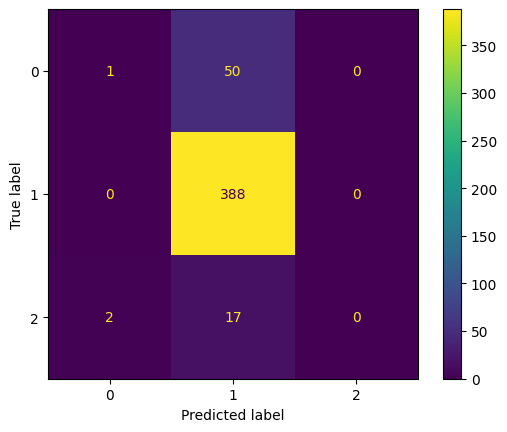


 Confusion matrix for SIFT+SVM model


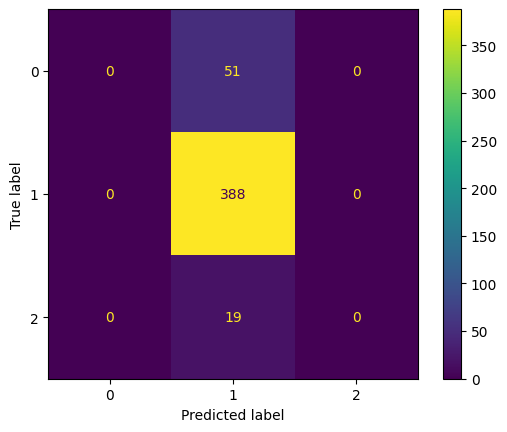

['drive/MyDrive/Colab Notebooks/CW_Folder_UG/Models/sift-svm.joblib']

In [2]:
from google.colab import drive
import os, sys, random, cv2
from skimage import io, transform, color, img_as_ubyte
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import MiniBatchKMeans
from sklearn import svm, metrics
from joblib import dump, load

%matplotlib inline
# Make importing .py functions easier
%load_ext autoreload
%autoreload 2

# Colab setup
drive.mount('/content/drive')
!pip install opencv-python==4.5.5.64
!pip show opencv-python
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/CW_Folder_UG'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print('\n\n', (os.listdir(GOOGLE_DRIVE_PATH)), '\n\n')
CODE_PATH = os.path.join(GOOGLE_DRIVE_PATH, 'Code')
sys.path.append(CODE_PATH)

# Unzip datasets
zip_path = os.path.join(GOOGLE_DRIVE_PATH, 'CW_Dataset.zip')
!cp '{zip_path}' .
!yes | unzip -q CW_Dataset.zip
!rm CW_Dataset.zip

path_to_trainset = 'CW_Dataset/train'
path_to_testset = 'CW_Dataset/test'
#path to testset can be changed, by commenting the above line, and uncommenting the below line
# path_to_testset = 'Personal_Dataset'

def load_dataset(path, desired_height, desired_width):
    images = []
    labels = []
    #ref: https://www.w3schools.com/python/ref_func_open.asp for opening files
    label_files = [file for file in os.listdir(os.path.join(path, 'labels')) if file.endswith('.txt')]
    for label_file in label_files:
        with open(os.path.join(path, 'labels', label_file), 'r') as myFile:
            label = int(myFile.read().strip()) #ref: https://www.w3schools.com/python/ref_string_strip.asp clean up string content
            labels.append(label)
        image_name = label_file.replace('.txt', '.jpeg')
        image_path = os.path.join(path, 'images', image_name)
        image = io.imread(image_path)
        image = transform.resize(image, (desired_height, desired_width))
        images.append(image)
    return images, labels

X_train, y_train = load_dataset(path_to_trainset, desired_height=28, desired_width=28)
X_test, y_test = load_dataset(path_to_testset, desired_height=28, desired_width=28)
print("\n Number of training images loaded:", len(X_train)) #ref: https://www.w3schools.com/python/ref_func_len.asp length of list
print("\n\nTraining label distribution:", Counter(y_train))

#ref: lab05
def extract_hog_features(images):
    hog_features = []
    for image in images:
        HOG_des = hog(image, orientations=8, pixels_per_cell=(16, 16),
                      cells_per_block=(1, 1), visualize=False, channel_axis=2)
        hog_features.append(HOG_des)
    return np.array(hog_features)

X_train_hog = extract_hog_features(X_train)

# # Train Model 1 (HOG + SVM)
from my_train_SVM import train_linear_SVM
svm_classifier = train_linear_SVM(X_train_hog, y_train)

# Train Model 2 (HOG + MLP) ref: lab06
mlp_classifier = MLPClassifier(hidden_layer_sizes=(50, 100), max_iter=100, alpha=1e-4,
                               solver='sgd', verbose=True, random_state=1,
                               learning_rate_init=.1)
mlp_classifier.fit(X_train_hog, y_train)

#Train Model 3 (SIFT + SVM) ref: lab06
#ref: lab04
sift = cv2.SIFT_create()
#lists for feature descriptors and labels
des_list = []
y_train_list = []

for i in range(len(X_train)):
    # Identify keypoints and extract descriptors with SIFT
    img = img_as_ubyte(color.rgb2gray(X_train[i]))
    kp, des = sift.detectAndCompute(img, None)
    if des is not None:
        des_list.append(des.astype(np.float32))
        y_train_list.append(y_train[i])

# Convert to array for easier handling
des_array = np.vstack(des_list)
# codewords
k = len(np.unique(y_train)) * 10
batch_size = des_array.shape[0] // 4
kmeans = MiniBatchKMeans(n_clusters=k, batch_size=batch_size, n_init='auto').fit(des_array)

# Convert descriptors into histograms of codewords for each image
hist_list = []
idx_list = []

for des in des_list:
    hist = np.zeros(k, dtype=np.float32) # ref: https://numpy.org/doc/stable/user/basics.types.html

    idx = kmeans.predict(des)
    idx_list.append(idx)
    for j in idx:
        hist[j] = hist[j] + (1 / len(des))
    hist_list.append(hist)

hist_array = np.vstack(hist_list)
sift_classifier = svm.SVC(kernel='rbf')
sift_classifier.fit(hist_array, y_train_list)

def extract_sift_descriptors(images):
    sift_descriptors = []
    for image in images:
        if image.ndim == 3 and image.shape[-1] == 4:
            img_gray = color.rgb2gray(image[:, :, :3]) # Convert RGB or RGBA to grayscale
        elif image.ndim == 3:
            img_gray = color.rgb2gray(image)
        else:
            img_gray = image # Grayscale image, no need to convert

        img_ubyte = img_as_ubyte(img_gray)
        kp, des = sift.detectAndCompute(img_ubyte, None)
        if des is not None:
            sift_descriptors.append(des.astype(np.float32))
        else:
            sift_descriptors.append(np.zeros((1, 128), dtype=np.float32))
    return sift_descriptors

def compute_sift_histograms(sift_descriptors):
    sift_hist = []
    for des in sift_descriptors:
        hist = np.zeros(k, dtype=np.float32)
        idx = kmeans.predict(des)
        for j in idx:
            hist[j] += 1
        sift_hist.append(hist)
    return np.vstack(sift_hist)

def MaskDetection(path_to_testset, model_type):
    if model_type == 'hog_svm':
        X_test_hog = extract_hog_features(X_test)
        y_pred = svm_classifier.predict(X_test_hog)
    elif model_type == 'hog_mlp':
        X_test_hog = extract_hog_features(X_test)
        y_pred = mlp_classifier.predict(X_test_hog)
    elif model_type == 'sift_svm':
        sift_descriptors = extract_sift_descriptors(X_test)
        sift_hist_array = compute_sift_histograms(sift_descriptors)
        y_pred = sift_classifier.predict(sift_hist_array)
    else:
        raise ValueError("Unknown model type")

    test_sample = random.sample(range(len(X_test)), 4)
    fig, axes = plt.subplots(1, 4, figsize=(10, 5), sharex=True, sharey=True)
    ax = axes.ravel()
    for i in range(4):
        ax[i].imshow(X_test[test_sample[i]], cmap='gray')
        ax[i].set_title(f'Label: {y_test[test_sample[i]]} \n Prediction: {y_pred[i]}')
        ax[i].set_axis_off()
    fig.tight_layout()
    plt.show()
    return y_pred

print("\n HOG+SVM test")
y_pred_hog_svm = MaskDetection(path_to_testset, model_type='hog_svm')
print("\n HOG+MLP test")
y_pred_mlp = MaskDetection(path_to_testset, model_type='hog_mlp')
print("\n SIFT+SVM test")
y_pred_sift_svm = MaskDetection(path_to_testset, model_type='sift_svm')

print(f"""\n Classification report for classifier {svm_classifier}: \n {metrics.classification_report(y_test, y_pred_hog_svm)}\n""")
print(f"""\n Classification report for classifier {mlp_classifier}: \n {metrics.classification_report(y_test, y_pred_mlp)}\n""")
print(f"""\n Classification report for classifier {sift_classifier}: \n {metrics.classification_report(y_test, y_pred_sift_svm)}\n""")

print("\n Confusion matrix for HOG+SVM model")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_hog_svm)
plt.show()
print("\n Confusion matrix for HOG+MLP model")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_mlp)
plt.show()
print("\n Confusion matrix for SIFT+SVM model")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_sift_svm)
plt.show()

# Save the trained models
dump(svm_classifier, os.path.join(GOOGLE_DRIVE_PATH, 'Models', 'hog-svm.joblib'))
dump(mlp_classifier, os.path.join(GOOGLE_DRIVE_PATH, 'Models', 'hog-mlp.joblib'))
dump(sift_classifier, os.path.join(GOOGLE_DRIVE_PATH, 'Models', 'sift-svm.joblib'))